# BENG 212 Project 2: iModulons and Phase Planes

**BENG 212 Systems Biology and Bioengineering II - Winter 2025 - Robin Anwyl**

This notebook contains my Project 2 code, figures, and written interpretation of results. My two chosen iModulons were Purine and Pyrimidine.

Assignment:
-  Choose two iModulons
-  Analyze each iModulon individually
-  Investigate the activity phase plane of the two iModulons for patterns and potentially biologically significant sets of samples. Highlight several findings in the phase plane and connect them to the biological function of the iMs and their genes.
- Take one or more of these lines of analysis and further explore them using your own methods, or ask a diﬀerent research question and explore a diﬀerent angle to the project

## Setup
### Import packages

In [40]:
# built-in packages
import os.path
import re
import json
import gzip

# third-party (pip install required)
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymodulon
from pymodulon.io import load_json_model
from pymodulon.plotting import * # Edited
from pymodulon.core import IcaData
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import seaborn as sns
import warnings
from matplotlib import pylab
from pymodulon.util import infer_activities
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# set matplotlib params
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
pd.set_option('display.max_columns', None)

### Load PRECISE_WT_MG1655 Data

In [41]:
p1k_proj2 = pymodulon.io.load_json_model('PRECISE_WT_MG1655_final2.json.gz')

### Chosen iModulons

In [42]:
X_IM = 'Purine'
Y_IM = 'Pyrimidine'

## Individual iModulon Analysis

### Purine iModulon Analysis

The purine iModulon governs purine biosynthesis, metabolism, and transport. The gene weight plot below highlights the major functions and relative importance of purine iModulon genes. The vast majority of the genes are involved in nucleotide transport and metabolism. Genes with other Clusters of Orthologous Genes (COG) classifications play supporting or regulatory roles in purine metabolism, such as purR (regulator), punC (involved in purine salvage), menI (involved in purine metabolism via redox balance), and ydiJ (involved with energy production, which is linked to metabolism).

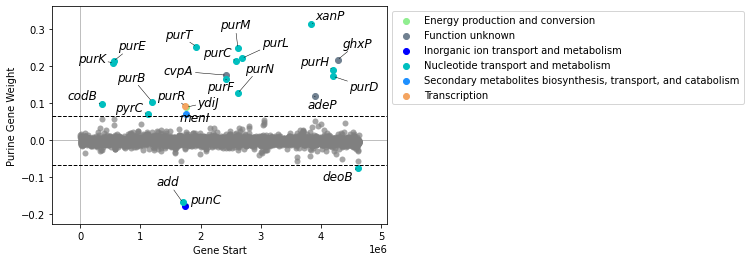

In [43]:
p = plot_gene_weights(p1k_proj2,'Purine', show_labels=True)

Purine iModulon genes are involved in the purine biosynthesis and purine salvage pathways. Purine iModulon genes involved in purine biosynthesis are purF, purD, purT, purL, purM, purK, purE, purC, purB, purH, and purP; these genes are part of the main biosynthetic pathway or involved with alternate steps in the pathway. The purine salvage pathway facilitates nucleotide recycling and is important for maintaining nucleotide homeostasis in nutrient-limited conditions. The purine iModulon genes in this pathway are add, codB, deoB, punC, xanP, ghxP, and adeP. Compared to the purine iModulon genes in the biosynthesis pathway, which are all classified as “Nucleotide transport and metabolism” genes, these purine salvage genes have a greater range of functional classifications.

### Pyrimidine iModulon Analysis

The pyrimidine iModulon governs pyrimidine biosynthesis, metabolism, and transport. The gene weight plot below highlights the major functions and relative importance of purine iModulon genes. Most of these genes are involved in nucleotide transport and metabolism. As for the two genes with different COG classifications, caiF regulates carnitine metabolism under anaerobic conditions and ridA eliminates reactive intermediates formed during amino acid metabolism; these genes are still linked to pyrimidine metabolism.

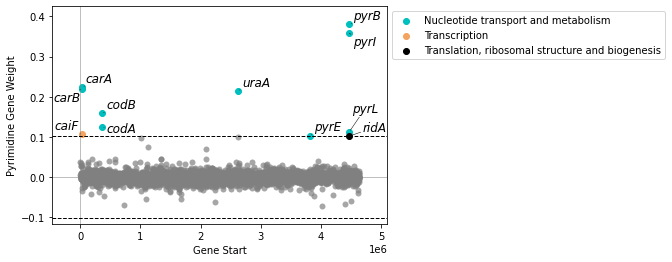

In [44]:
p = plot_gene_weights(p1k_proj2, 'Pyrimidine')

The two major pathways that involve pyrimidine iModulon genes are the biosynthesis and salvage pathways. The genes carA, carB, pyrB, and pyrI are part of the biosynthetic pathway. Notably, pyrB and pyrI are the two highest weighted genes in the gene weight plot, emphasizing their importance. carA and carB also play a role in arginine biosynthesis, indicating a functional connection to amino acid metabolism. The pyrimidine iModulon genes codA, codB, and uraA are members of the salvage pathways for cytosine and uracil.

## Phase Plane Analysis

To explore the connections between the purine and pyrimidine iModulons, we will examine the iModulon activity phase plane. In the P-MG1655 dataset, purine and pyrimidine iModulon activities are positively correlated with a Spearman R of 0.70 and a Pearson R of 0.63.

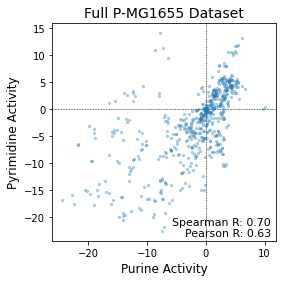

In [45]:
# p1k
_, ax = plt.subplots(figsize=(4, 4))

ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

# BW strain
x_p1k_acts, y_p1k_acts = p1k_proj2.A.loc['Purine'], p1k_proj2.A.loc['Pyrimidine']

# we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
ax.scatter(x_p1k_acts, y_p1k_acts, c='tab:blue', s=5, alpha=0.3)

# you may need to move this label depending on your specific phase plane
spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', 
        transform=ax.transAxes, ha='right', fontsize=11)

ax.set_xlabel('Purine Activity', fontsize=12)
ax.set_ylabel('Pyrimidine Activity', fontsize=12)
a = ax.set_title('Full P-MG1655 Dataset', fontsize=14)

The gene weight plot comparison below shows that the iModulons share one common gene, codB, which encodes a cytosine transporter that works in coordination with other nucleobase transporters.

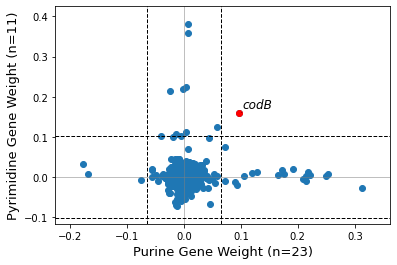

In [46]:
gene_weight_ax = compare_gene_weights(p1k_proj2, X_IM, Y_IM);

gene_weight_ax.set_xlabel(f'{X_IM} Gene Weight (n={p1k_proj2.view_imodulon(X_IM).shape[0]})', fontsize=13);
gene_weight_ax.set_ylabel(f'{Y_IM} Gene Weight (n={p1k_proj2.view_imodulon(Y_IM).shape[0]})', fontsize=13);

### Single Nutrient Perturbation

Metadata box plots (not shown) revealed that the experimental conditions with the greatest impact on purine or pyrimidine iModulon activity included base media, carbon source, nitrogen source, and supplement. Studies have shown that adenine supplementation reduces purine iModulon activity and cytosine supplementation reduces pyrimidine iModulon activity. The “SNPv1” single nutrient perturbation study supplemented base E. coli media with adenine, cytosine, the purine nucleosides adenosine and inosine, and the pyrimidine nucleosides cytidine and uridine. To determine whether nucleoside addition has a similar effect as nucleotide addition, these SNPv1 samples are highlighted in the activity phase plane below.

In [47]:
#p1k_proj2.sample_table[p1k_proj2.sample_table['project'] == 'SNPv1'].head()

In [48]:
X_IM, Y_IM = 'Purine', 'Pyrimidine'
actually_useful_md_cols = ['study', 'project', 'condition', 'Strain Description', 'Strain', 'Culture Type',
                          'Evolved Sample', 'Base Media', 'Temperature (C)', 'pH', 'Carbon Source (g/L)',
                          'Nitrogen Source (g/L)', 'Electron Acceptor', 'Supplement', 'Growth Rate (1/hr)']
sample_table = p1k_proj2.sample_table[actually_useful_md_cols]
adenine = sample_table.loc[(sample_table['project'].str.contains('SNPv1') &
                            sample_table['Nitrogen Source (g/L)'].str.contains('Adenine', case=False, na=False))]
cytosine = sample_table.loc[(sample_table['project'].str.contains('SNPv1') &
    sample_table['Nitrogen Source (g/L)'].str.contains('Cytosine', case=False, na=False))]
pur_nucleosides = sample_table.loc[(
    sample_table['Carbon Source (g/L)'].str.contains('Adenosine', case=False, na=False) | 
    sample_table['Carbon Source (g/L)'].str.contains('Inosine', case=False, na=False) |
    sample_table['Nitrogen Source (g/L)'].str.contains('Adenosine', case=False, na=False) |
    sample_table['Nitrogen Source (g/L)'].str.contains('Adenine', case=False, na=False) &
    sample_table['project'].str.contains('SNPv1')
)]
pyr_nucleosides = sample_table.loc[(
    sample_table['Carbon Source (g/L)'].str.contains('Cytidine', case=False, na=False) |
    sample_table['Carbon Source (g/L)'].str.contains('Uridine', case=False, na=False) |
    sample_table['Nitrogen Source (g/L)'].str.contains('Cytidine', case=False, na=False) &
    sample_table['project'].str.contains('SNPv1')
)]

# merge with iM activity data
A = p1k_proj2.A
phase_plane_A = A.loc[[X_IM, Y_IM]].T
adenine = adenine.merge(phase_plane_A, left_index=True, right_index=True, how='left').sort_values(by=X_IM)
cytosine = cytosine.merge(phase_plane_A, left_index=True, right_index=True, how='left').sort_values(by=X_IM)
pur_nucleosides = pur_nucleosides.merge(phase_plane_A, left_index=True, right_index=True, how='left').sort_values(by=X_IM)
pyr_nucleosides = pyr_nucleosides.merge(phase_plane_A, left_index=True, right_index=True, how='left').sort_values(by=X_IM)

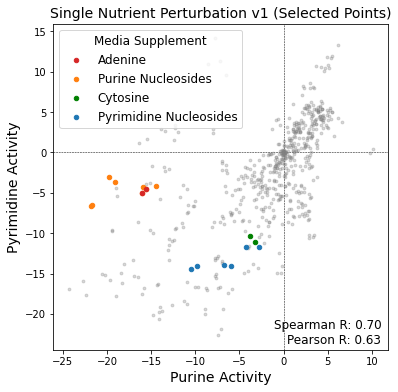

In [49]:
A = p1k_proj2.A

_, ax = plt.subplots(figsize=(6, 6))

ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

x_p1k_acts, y_p1k_acts = A.loc[X_IM], A.loc[Y_IM]

# we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
ax.scatter(x_p1k_acts, y_p1k_acts, c='gray', s=8, alpha=0.3)

# you may need to move this label depending on your specific phase plane
spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', 
        transform=ax.transAxes, ha='right', fontsize=12)

# plotting the selected points
ax.scatter(adenine['Purine'], adenine['Pyrimidine'], c='tab:red', s=20, label='Adenine', zorder=3)
ax.scatter(pur_nucleosides['Purine'], pur_nucleosides['Pyrimidine'], c='tab:orange', s=20, label='Purine Nucleosides')
ax.scatter(cytosine['Purine'], cytosine['Pyrimidine'], c='green', s=20, label='Cytosine', zorder=3)
ax.scatter(pyr_nucleosides['Purine'], pyr_nucleosides['Pyrimidine'], c='tab:blue', s=20, label='Pyrimidine Nucleosides')

ax.set_xlabel(f'{X_IM} Activity', fontsize=14)
ax.set_ylabel(f'{Y_IM} Activity', fontsize=14)
ax.set_title('Single Nutrient Perturbation v1 (Selected Points)', fontsize=14)
a = ax.legend(title='Media Supplement', loc='upper left', fontsize=12, title_fontsize=12)


From the highlighted phase plane, we see that the addition of adenine, adenosine, or inosine to media correlates with decreased purine iModulon activity. Similarly, the addition of cytosine, cytidine, or uridine to media correlates with decreased pyrimidine iModulon activity. This data suggests that with sufficient nucleotide or nucleoside concentration in media, additional nucleotides will not need to be synthesized, resulting in decreased activity of iModulons governing nucleotide metabolism.

### Electric coli

To continue exploration of the activity phase plane, phase planes highlighting individual projects were examined. The Electric coli project displayed a strong correlation between purine and pyrimidine iModulon activity, with a Spearman R of 0.92 and a Pearson R of 0.90.

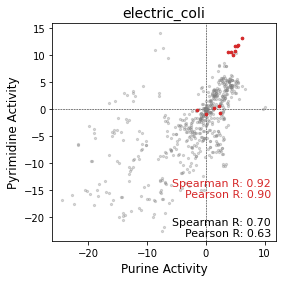

In [50]:
A = p1k_proj2.A
for project, proj_md_df in p1k_proj2.sample_table[p1k_proj2.sample_table['Strain'] == 'MG1655'].groupby('project'):
    if project == 'electric_coli':

        _, ax = plt.subplots(figsize=(4, 4))

        ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
        ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

        x_p1k_acts, y_p1k_acts = A.loc[X_IM], A.loc[Y_IM]

        # we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
        ax.scatter(x_p1k_acts, y_p1k_acts, c='tab:gray', s=5, alpha=0.3)

        # you may need to move this label depending on your specific phase plane
        spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
        pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
        ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', 
                transform=ax.transAxes, ha='right', fontsize=11)

        # now overlay the project-specific data
        proj_A = A[proj_md_df.index]
        labels = proj_md_df['condition']
        x_proj_acts, y_proj_acts = proj_A.loc[X_IM], proj_A.loc[Y_IM]
        ax.scatter(x_proj_acts, y_proj_acts, c='tab:red', s=7)

        # add in a project-specific set of correlations
        proj_spearman_r, p = spearmanr(x_proj_acts, y_proj_acts)
        proj_pearson_r, p = pearsonr(x_proj_acts, y_proj_acts)
        ax.text(0.98, 0.2, f'Spearman R: {proj_spearman_r:.2f}\nPearson R: {proj_pearson_r:.2f}', 
                transform=ax.transAxes, ha='right', color='tab:red', fontsize=11)

        ax.set_xlabel(f'{X_IM} Activity', fontsize=12)
        ax.set_ylabel(f'{Y_IM} Activity', fontsize=12)
        ax.set_title(proj_md_df['study'].iloc[0], fontsize=14)

In this study, the authors investigated extracellular electron transport (EET) mediated by 2-hydroxy-1,4-naphthoquinone (HNQ), uncovering a latent extracellular respiratory pathway in E. coli that drives anaerobic catabolism and growth. To determine which conditions corresponded to increased activity of both iModulons, the project-specific activity spectra are displayed below.

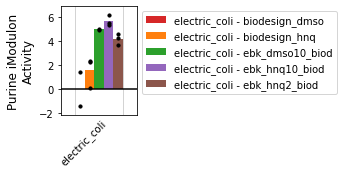

In [51]:
plot_activities(p1k_proj2, 'Purine', projects=['electric_coli']);

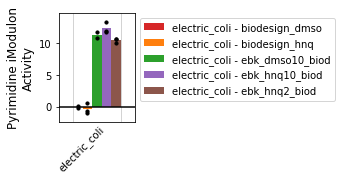

In [52]:
plot_activities(p1k_proj2, 'Pyrimidine', projects=['electric_coli']);

In [53]:
#p1k_proj2.sample_table[p1k_proj2.sample_table['project'] == 'electric_coli']

Based on sample metadata, it can be assumed that the conditions in which both iModulon activities increased correspond to E. coli cells from the MG1655-derived BioDesignER (BioD) strain cultured in a bioelectrochemical system (BES). Purine and pyrimidine iModulon activity increased in all BES samples, implying the activity increase is linked to EET rather than a specific electron acceptor. These findings suggest that nucleotide biosynthesis is upregulated by stress or by the shift to EET-mediated anaerobic energy metabolism.

## Further Exploration

In Lecture 5, we learned about the transition from the exponential growth phase to the stationary phase in E. coli. Lim et al (2025) explored the transcriptional changes that occur in this transition when driven by carbon, nitrogen, or sulfur starvation. Purine and pyrimidine iModulon activity decrease in this transition; as such, further analysis of study data with a focus on these iModulons could reveal additional findings. The Stationary Phase data was downloaded from GitHub. Since the log TPM file for the P-MG1655 dataset was not provided, the study data was added to the PRECISE-1K dataset (hereafter called P1K Dataset) provided with the Tiled Phase Plane and Analyze New Data demo notebooks. iModulon activity in the Stationary Phase study was inferred based on the P1K Dataset.

### Add Stationary Phase data to P1K Dataset and infer study iModulon activity

In [54]:
X_IM = 'Purine'
Y_IM = 'Pyrimidine'

Load in P1K json file from class demos

In [55]:
p1k = pymodulon.io.load_json_model('precise1k.json.gz')
p1k_log_tpm_qc = pd.read_csv('log_tpm_qc.csv', index_col=0)

Compare to P1K_WT_MG1655 json file

In [56]:
print(p1k.sample_table['project'].unique())

['control' 'fur' 'acid' 'oxidative' 'nac_ntrc' 'misc' 'omics' 'ompr'
 'minspan' 'cra_crp' 'rpoB' 'crp' 'glu' '42c' 'ssw' 'ica' 'ytf' 'fps'
 'pal' 'efeU' 'misc2' 'nquinone' 'quinone' 'oxyR' 'svns_pgi' 'abx_media'
 'hot_tale' 'pdhr_ale' 'tcs' 'ros_tale' 'pcoli' 'cck' 'cck_pgi' 'cck_sdh'
 'cck_pts' 'cck_gnd' 'cck_tpiA' 'acid_tale' 'adnB' 'ytf2' 'ytf3'
 'minicoli' 'eep' 'DDB2' 'DDB3']


In [57]:
p1k.sample_table.head()

,sample_id,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),pH,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Antibiotic for selection,Growth Rate (1/hr),Isolate Type,Additional Details,project_reference,Sequencing Machine,LibraryLayout,Platform,Biological Replicates,DOI,GEO,SRX,Run,R1,R2,contact,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date
p1k_00001,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,7.0,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,NaN,p1k_00001;p1k_00002,MiSeq,PAIRED,ILLUMINA,2.0,doi.org/10.1093/nar/gky069,GSE65643,SRX865357,SRR1787590,s3://precise-db/raw_data/control/MG1655-M9-glu...,s3://precise-db/raw_data/control/MG1655-M9-glu...,Sangwoo Seo,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13
p1k_00002,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,7.0,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,NaN,p1k_00001;p1k_00002,MiSeq,PAIRED,ILLUMINA,2.0,doi.org/10.1093/nar/gky069,GSE65643,SRX865358,SRR1787591,s3://precise-db/raw_data/control/MG1655-M9-glu...,s3://precise-db/raw_data/control/MG1655-M9-glu...,Sangwoo Seo,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13
p1k_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,7.0,glucose(2),NH4Cl(1),O2,NaN,DPD (0.2mM),NaN,0.00,NaN,NaN,p1k_00005;p1k_00006,MiSeq,PAIRED,ILLUMINA,2.0,doi.org/10.1038/ncomms5910,GSE54900,SRX469840,SRR1168135,s3://precise-db/raw_data/fur/WTDPD1_S1_L001_R1...,s3://precise-db/raw_data/fur/WTDPD1_S1_L001_R2...,Sangwoo Seo,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13
p1k_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,7.0,glucose(2),NH4Cl(1),O2,NaN,DPD (0.2mM),NaN,0.00,NaN,NaN,p1k_00005;p1k_00006,MiSeq,PAIRED,ILLUMINA,2.0,doi.org/10.1038/ncomms5910,GSE54900,SRX469841,SRR1168136,s3://precise-db/raw_data/fur/WTDPD2_S1_L001_R1...,s3://precise-db/raw_data/fur/WTDPD2_S1_L001_R2...,Sangwoo Seo,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13
p1k_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,7.0,glucose(2),NH4Cl(1),O2,NaN,FeCl2 (0.1mM),NaN,1.06,NaN,NaN,p1k_00005;p1k_00006,MiSeq,PAIRED,ILLUMINA,2.0,doi.org/10.1038/ncomms5910,GSE54900,SRX469838,SRR1168133,s3://precise-db/raw_data/fur/WT-Fe2-1_S1_L001_...,s3://precise-db/raw_data/fur/WT-Fe2-1_S1_L001_...,Sangwoo Seo,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,9/5/13


In [58]:
print(p1k.sample_table['project'].unique())

['control' 'fur' 'acid' 'oxidative' 'nac_ntrc' 'misc' 'omics' 'ompr'
 'minspan' 'cra_crp' 'rpoB' 'crp' 'glu' '42c' 'ssw' 'ica' 'ytf' 'fps'
 'pal' 'efeU' 'misc2' 'nquinone' 'quinone' 'oxyR' 'svns_pgi' 'abx_media'
 'hot_tale' 'pdhr_ale' 'tcs' 'ros_tale' 'pcoli' 'cck' 'cck_pgi' 'cck_sdh'
 'cck_pts' 'cck_gnd' 'cck_tpiA' 'acid_tale' 'adnB' 'ytf2' 'ytf3'
 'minicoli' 'eep' 'DDB2' 'DDB3']


Load in and validate Stationary Phase project data (log tpm) and metadata

In [59]:
PROJECT_NAME = 'stationary' # this should be the same as the 'project' column in the project_metadata

project_metadata = pd.read_csv('stationary_metadata.csv', index_col=0)

# this is expected to be log2 transformed
project_log_tpm = pd.read_csv('stationary_log_tpm.csv', index_col=0)

In [60]:
try:
    PROJECT_NAME
except NameError:
    raise("PROJECT_NAME variable must be defined")
assert 'project' in project_metadata.columns # need a 'project' column
assert 'condition' in project_metadata.columns # need a 'condition' column
assert 'sample_id' in project_metadata.columns # need a 'sample_id column'
assert len(project_metadata['sample_id'].unique()) == len(project_metadata['sample_id']) # and it must be unique
assert (project_log_tpm.columns == project_metadata.index).all() # sample names should appear consistently in log_tpm and metadata
assert project_metadata['project'].unique()[0] == PROJECT_NAME # project name variable should be same as project column

Combine project data and metadata with P1K

In [61]:
p1k_project_log_tpm = p1k_log_tpm_qc.merge(project_log_tpm, left_index=True, right_index=True, how='inner')
p1k_references = ['p1k_00001', 'p1k_00002']
p1k_project_log_tpm_norm = p1k_project_log_tpm.sub(p1k_project_log_tpm[p1k_references].mean(axis=1), axis=0)
p1k_project_log_tpm_norm.head()

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,p1k_00011,p1k_00012,p1k_00014,p1k_00015,p1k_00016,p1k_00017,p1k_00018,p1k_00019,p1k_00020,p1k_00021,p1k_00022,p1k_00023,p1k_00024,p1k_00025,p1k_00026,p1k_00027,p1k_00028,p1k_00029,p1k_00030,p1k_00031,p1k_00032,p1k_00033,p1k_00034,p1k_00035,p1k_00036,p1k_00037,p1k_00038,p1k_00039,p1k_00040,p1k_00041,p1k_00042,p1k_00043,p1k_00044,p1k_00045,p1k_00046,p1k_00047,p1k_00048,p1k_00049,p1k_00050,p1k_00051,p1k_00052,p1k_00053,p1k_00054,p1k_00055,p1k_00056,p1k_00057,p1k_00058,p1k_00059,p1k_00060,p1k_00061,p1k_00062,p1k_00063,p1k_00064,p1k_00065,p1k_00066,p1k_00067,p1k_00068,p1k_00070,p1k_00071,p1k_00072,p1k_00073,p1k_00074,p1k_00075,p1k_00077,p1k_00078,p1k_00079,p1k_00080,p1k_00081,p1k_00082,p1k_00083,p1k_00084,p1k_00085,p1k_00086,p1k_00087,p1k_00088,p1k_00089,p1k_00090,p1k_00091,p1k_00092,p1k_00093,p1k_00094,p1k_00095,p1k_00096,p1k_00097,p1k_00098,p1k_00099,p1k_00100,p1k_00101,p1k_00102,p1k_00103,p1k_00104,p1k_00105,p1k_00106,p1k_00107,p1k_00108,p1k_00109,p1k_00110,p1k_00111,p1k_00112,p1k_00113,p1k_00114,p1k_00115,p1k_00116,p1k_00117,p1k_00118,p1k_00119,p1k_00120,p1k_00121,p1k_00122,p1k_00123,p1k_00124,p1k_00125,p1k_00126,p1k_00127,p1k_00128,p1k_00129,p1k_00130,p1k_00131,p1k_00132,p1k_00133,p1k_00134,p1k_00135,p1k_00136,p1k_00137,p1k_00138,p1k_00139,p1k_00140,p1k_00141,p1k_00142,p1k_00143,p1k_00144,p1k_00145,p1k_00146,p1k_00147,p1k_00148,p1k_00149,p1k_00150,p1k_00151,p1k_00152,p1k_00153,p1k_00154,p1k_00155,p1k_00157,p1k_00158,p1k_00159,p1k_00160,p1k_00161,p1k_00162,p1k_00163,p1k_00164,p1k_00165,p1k_00166,p1k_00167,p1k_00168,p1k_00169,p1k_00170,p1k_00171,p1k_00172,p1k_00173,p1k_00174,p1k_00175,p1k_00176,p1k_00177,p1k_00178,p1k_00179,p1k_00180,p1k_00181,p1k_00182,p1k_00183,p1k_00184,p1k_00185,p1k_00186,p1k_00187,p1k_00188,p1k_00189,p1k_00190,p1k_00191,p1k_00192,p1k_00193,p1k_00194,p1k_00195,p1k_00196,p1k_00197,p1k_00198,p1k_00199,p1k_00200,p1k_00201,p1k_00202,p1k_00203,p1k_00204,p1k_00205,p1k_00206,p1k_00207,p1k_00208,p1k_00209,p1k_00210,p1k_00211,p1k_00212,p1k_00213,p1k_00214,p1k_00215,p1k_00216,p1k_00217,p1k_00218,p1k_00219,p1k_00220,p1k_00221,p1k_00222,p1k_00223,p1k_00224,p1k_00225,p1k_00226,p1k_00227,p1k_00228,p1k_00229,p1k_00230,p1k_00231,p1k_00232,p1k_00233,p1k_00234,p1k_00235,p1k_00236,p1k_00237,p1k_00238,p1k_00239,p1k_00240,p1k_00241,p1k_00242,p1k_00243,p1k_00244,p1k_00245,p1k_00246,p1k_00247,p1k_00248,p1k_00249,p1k_00250,p1k_00251,p1k_00252,p1k_00253,p1k_00254,p1k_00255,p1k_00256,p1k_00257,p1k_00258,p1k_00259,p1k_00260,p1k_00261,p1k_00262,p1k_00263,p1k_00264,p1k_00265,p1k_00266,p1k_00267,p1k_00268,p1k_00269,p1k_00270,p1k_00271,p1k_00272,p1k_00273,p1k_00274,p1k_00275,p1k_00276,p1k_00277,p1k_00278,p1k_00279,p1k_00280,p1k_00281,p1k_00282,p1k_00283,p1k_00284,p1k_00285,p1k_00286,p1k_00287,p1k_00288,p1k_00289,p1k_00290,p1k_00291,p1k_00292,p1k_00293,p1k_00294,p1k_00295,p1k_00296,p1k_00297,p1k_00298,p1k_00299,p1k_00300,p1k_00301,p1k_00302,p1k_00303,p1k_00304,p1k_00305,p1k_00306,p1k_00307,p1k_00308,p1k_00309,p1k_00310,p1k_00311,p1k_00312,p1k_00313,p1k_00314,p1k_00315,p1k_00316,p1k_00317,p1k_00318,p1k_00319,p1k_00320,p1k_00321,p1k_00322,p1k_00323,p1k_00324,p1k_00325,p1k_00326,p1k_00327,p1k_00328,p1k_00329,p1k_00330,p1k_00331,p1k_00332,p1k_00333,p1k_00334,p1k_00335,p1k_00336,p1k_00337,p1k_00338,p1k_00339,p1k_00340,p1k_00341,p1k_00342,p1k_00343,p1k_00344,p1k_00345,p1k_00346,p1k_00347,p1k_00348,p1k_00349,p1k_00350,p1k_00351,p1k_00352,p1k_00353,p1k_00354,p1k_00355,p1k_00356,p1k_00357,p1k_00358,p1k_00359,p1k_00360,p1k_00361,p1k_00362,p1k_00363,p1k_00364,p1k_00365,p1k_00366,p1k_00367,p1k_00368,p1k_00369,p1k_00370,p1k_00371,p1k_00372,p1k_00373,p1k_00374,p1k_00375,p1k_00376,p1k_00377,p1k_00378,p1k_00379,p1k_00380,p1k_00381,p1k_00382,p1k_00383,p1k_00384,p1k_00385,p1k_00386,p1k_00387,p1k_00388,p1k_00389,p1k_00390,p1k_00391,p1k_00392,p1k_00393,p1k_00394,p1k_00395,p1k_00396,p1k_00397,p1k_00398,p1k_00399,p1k_00400,p1k_00401,p1k_00402,p1k_00403,p1k_00404

In [62]:
p1k_project_metadata = pd.concat([p1k.sample_table, project_metadata])
p1k_project_metadata.tail()

,sample_id,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),pH,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Antibiotic for selection,Growth Rate (1/hr),Isolate Type,Additional Details,project_reference,Sequencing Machine,LibraryLayout,Platform,Biological Replicates,DOI,GEO,SRX,Run,R1,R2,contact,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date
p1k_01087,S-GlcM9_4_8h__2,Stationary_phase,stationary,S-GlcM9_8h,2,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,37,7.0,glucose(2),NH4Cl(0.5),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,MgSO4(0.03mM),p1k_01060;p1k_01061,NovaSeq 6000,PAIRED,ILLUMINA,NaN,NaN,NaN,NaN,NaN,s3://precise-db/raw_data/StationaryPhase/MG165...,s3://precise-db/raw_data/StationaryPhase/MG165...,Hyungyu Lim,Hyungyu Lim,NaN,NaN,NaN,NaN,stationary:S-GlcM9_8h,NaN,NaN,2/10/22
p1k_01088,S-GlcM9_5_12h__1,Stationary_phase,stationary,S-GlcM9_12h,1,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,37,7.0,glucose(2),NH4Cl(0.5),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,MgSO4(0.03mM),p1k_01060;p1k_01061,NovaSeq 6000,PAIRED,ILLUMINA,NaN,NaN,NaN,NaN,NaN,s3://precise-db/raw_data/StationaryPhase/MG165...,s3://precise-db/raw_data/StationaryPhase/MG165...,Hyungyu Lim,Hyungyu Lim,NaN,NaN,NaN,NaN,stationary:S-GlcM9_12h,NaN,NaN,2/10/22
p1k_01089,S-GlcM9_5_12h__2,Stationary_phase,stationary,S-GlcM9_12h,2,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,37,7.0,glucose(2),NH4Cl(0.5),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,MgSO4(0.03mM),p1k_01060;p1k_01061,NovaSeq 6000,PAIRED,ILLUMINA,NaN,NaN,NaN,NaN,NaN,s3://precise-db/raw_data/StationaryPhase/MG165...,s3://precise-db/raw_data/StationaryPhase/MG165...,Hyungyu Lim,Hyungyu Lim,NaN,NaN,NaN,NaN,stationary:S-GlcM9_12h,NaN,NaN,2/10/22
p1k_01090,S-GlcM9_6_24h__1,Stationary_phase,stationary,S-GlcM9_24h,1,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,37,7.0,glucose(2),NH4Cl(0.5),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,MgSO4(0.03mM),p1k_01060;p1k_01061,NovaSeq 6000,PAIRED,ILLUMINA,NaN,NaN,NaN,NaN,NaN,s3://precise-db/raw_data/StationaryPhase/MG165...,s3://precise-db/raw_data/StationaryPhase/MG165...,Hyungyu Lim,Hyungyu Lim,NaN,NaN,NaN,NaN,stationary:S-GlcM9_24h,NaN,NaN,2/10/22
p1k_01091,S-GlcM9_6_24h__2,Stationary_phase,stationary,S-GlcM9_24h,2,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,37,7.0,glucose(2),NH4Cl(0.5),O2,sauer trace element mixture,NaN,NaN,NaN,NaN,MgSO4(0.03mM),p1k_01060;p1k_01061,NovaSeq 6000,PAIRED,ILLUMINA,NaN,NaN,NaN,NaN,NaN,s3://precise-db/raw_data/StationaryPhase/MG165...,s3://precise-db/raw_data/StationaryPhase/MG165...,Hyungyu Lim,Hyungyu Lim,NaN,NaN,NaN,NaN,stationary:S-GlcM9_24h,NaN,NaN,2/10/22


Infer activities of P1K's iModulons in the new data

In [63]:
inferred_A = infer_activities(p1k, p1k_project_log_tpm_norm[project_metadata.index])
inferred_A.head()

/opt/conda/lib/python3.9/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,p1k_01056,p1k_01057,p1k_01058,p1k_01059,p1k_01060,p1k_01061,p1k_01062,p1k_01063,p1k_01064,p1k_01065,p1k_01066,p1k_01067,p1k_01068,p1k_01069,p1k_01070,p1k_01071,p1k_01072,p1k_01073,p1k_01074,p1k_01075,p1k_01076,p1k_01077,p1k_01078,p1k_01079,p1k_01080,p1k_01081,p1k_01082,p1k_01083,p1k_01084,p1k_01085,p1k_01086,p1k_01087,p1k_01088,p1k_01089,p1k_01090,p1k_01091
Sugar Diacid,1.461693,1.305703,1.294786,0.775839,9.828888,10.451561,9.511473,6.320257,5.423193,5.629110,3.789391,5.511151,1.010480,1.264514,3.402962,2.960071,1.569888,1.990441,2.036314,2.585766,2.163856,2.908869,6.320036,3.217171,4.051791,1.165099,3.978219,2.606596,2.383434,3.196019,2.827625,2.627472,2.780509,1.983399,2.912432,6.362423
Translation,-7.710436,-6.082633,-9.574421,-8.187762,-24.605648,-33.084958,-26.300202,-22.228422,-15.483553,-18.936526,-15.559030,-14.268206,-7.439956,-7.640170,-23.068308,-24.120811,-24.350893,-25.015606,-20.240588,-23.875464,-21.531281,-23.463456,-27.404327,-22.795705,-26.911696,-9.332465,-28.519948,-21.229007,-21.766195,-29.058139,-23.659884,-21.756503,-23.007972,-21.309993,-18.002151,-27.952791
ygdT,2.389181,1.158334,1.978830,1.726466,1.049038,3.259561,1.128918,0.242810,1.730877,1.535582,3.600689,0.987235,2.158931,1.234348,3.881343,3.776046,3.803714,4.147009,3.157721,2.181067,2.431105,3.241817,2.502898,2.022972,2.985994,3.402688,3.269259,3.411730,4.349720,2.945668,3.517315,3.459894,2.849115,3.465856,2.944312,1.721357
OxyR,-1.324431,-1.173107,-1.545567,-1.742523,-1.359495,-1.647981,-1.857850,-1.532613,-1.329123,-1.426363,-1.971205,-2.025246,-1.016593,-0.949242,0.360518,0.601806,-0.212574,0.158495,-0.275722,0.444747,-0.280270,0.799642,-0.608384,2.305143,0.274918,-1.403611,-0.829016,-2.085044,-2.471948,-0.814955,-1.007671,-1.984552,-1.403309,-1.116527,-0.409846,-1.566981
FlhDC-2,-3.849210,-5.012761,-7.924119,-7.287845,-5.884195,-5.769524,-5.034424,-6.101830,-1.264762,-2.513670,-5.486666,-4.739372,-6.800854,-5.414501,-6.646939,-7.239950,-7.016661,-6.575315,-5.183369,-6.602165,-5.948021,-6.030109,-2.873411,-4.022136,-7.518560,-4.754254,-8.274504,-7.492150,-7.691251,-7.889958,-7.968505,-7.907308,-7.924722,-7.938017,-8.294768,-7.314135


Combine inferred activities for new data with P1K activities 

In [64]:
p1k_proj_A = pd.concat([p1k.A, inferred_A], axis=1)
p1k_proj_A.head()

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,p1k_00011,p1k_00012,p1k_00014,p1k_00015,p1k_00016,p1k_00017,p1k_00018,p1k_00019,p1k_00020,p1k_00021,p1k_00022,p1k_00023,p1k_00024,p1k_00025,p1k_00026,p1k_00027,p1k_00028,p1k_00029,p1k_00030,p1k_00031,p1k_00032,p1k_00033,p1k_00034,p1k_00035,p1k_00036,p1k_00037,p1k_00038,p1k_00039,p1k_00040,p1k_00041,p1k_00042,p1k_00043,p1k_00044,p1k_00045,p1k_00046,p1k_00047,p1k_00048,p1k_00049,p1k_00050,p1k_00051,p1k_00052,p1k_00053,p1k_00054,p1k_00055,p1k_00056,p1k_00057,p1k_00058,p1k_00059,p1k_00060,p1k_00061,p1k_00062,p1k_00063,p1k_00064,p1k_00065,p1k_00066,p1k_00067,p1k_00068,p1k_00070,p1k_00071,p1k_00072,p1k_00073,p1k_00074,p1k_00075,p1k_00077,p1k_00078,p1k_00079,p1k_00080,p1k_00081,p1k_00082,p1k_00083,p1k_00084,p1k_00085,p1k_00086,p1k_00087,p1k_00088,p1k_00089,p1k_00090,p1k_00091,p1k_00092,p1k_00093,p1k_00094,p1k_00095,p1k_00096,p1k_00097,p1k_00098,p1k_00099,p1k_00100,p1k_00101,p1k_00102,p1k_00103,p1k_00104,p1k_00105,p1k_00106,p1k_00107,p1k_00108,p1k_00109,p1k_00110,p1k_00111,p1k_00112,p1k_00113,p1k_00114,p1k_00115,p1k_00116,p1k_00117,p1k_00118,p1k_00119,p1k_00120,p1k_00121,p1k_00122,p1k_00123,p1k_00124,p1k_00125,p1k_00126,p1k_00127,p1k_00128,p1k_00129,p1k_00130,p1k_00131,p1k_00132,p1k_00133,p1k_00134,p1k_00135,p1k_00136,p1k_00137,p1k_00138,p1k_00139,p1k_00140,p1k_00141,p1k_00142,p1k_00143,p1k_00144,p1k_00145,p1k_00146,p1k_00147,p1k_00148,p1k_00149,p1k_00150,p1k_00151,p1k_00152,p1k_00153,p1k_00154,p1k_00155,p1k_00157,p1k_00158,p1k_00159,p1k_00160,p1k_00161,p1k_00162,p1k_00163,p1k_00164,p1k_00165,p1k_00166,p1k_00167,p1k_00168,p1k_00169,p1k_00170,p1k_00171,p1k_00172,p1k_00173,p1k_00174,p1k_00175,p1k_00176,p1k_00177,p1k_00178,p1k_00179,p1k_00180,p1k_00181,p1k_00182,p1k_00183,p1k_00184,p1k_00185,p1k_00186,p1k_00187,p1k_00188,p1k_00189,p1k_00190,p1k_00191,p1k_00192,p1k_00193,p1k_00194,p1k_00195,p1k_00196,p1k_00197,p1k_00198,p1k_00199,p1k_00200,p1k_00201,p1k_00202,p1k_00203,p1k_00204,p1k_00205,p1k_00206,p1k_00207,p1k_00208,p1k_00209,p1k_00210,p1k_00211,p1k_00212,p1k_00213,p1k_00214,p1k_00215,p1k_00216,p1k_00217,p1k_00218,p1k_00219,p1k_00220,p1k_00221,p1k_00222,p1k_00223,p1k_00224,p1k_00225,p1k_00226,p1k_00227,p1k_00228,p1k_00229,p1k_00230,p1k_00231,p1k_00232,p1k_00233,p1k_00234,p1k_00235,p1k_00236,p1k_00237,p1k_00238,p1k_00239,p1k_00240,p1k_00241,p1k_00242,p1k_00243,p1k_00244,p1k_00245,p1k_00246,p1k_00247,p1k_00248,p1k_00249,p1k_00250,p1k_00251,p1k_00252,p1k_00253,p1k_00254,p1k_00255,p1k_00256,p1k_00257,p1k_00258,p1k_00259,p1k_00260,p1k_00261,p1k_00262,p1k_00263,p1k_00264,p1k_00265,p1k_00266,p1k_00267,p1k_00268,p1k_00269,p1k_00270,p1k_00271,p1k_00272,p1k_00273,p1k_00274,p1k_00275,p1k_00276,p1k_00277,p1k_00278,p1k_00279,p1k_00280,p1k_00281,p1k_00282,p1k_00283,p1k_00284,p1k_00285,p1k_00286,p1k_00287,p1k_00288,p1k_00289,p1k_00290,p1k_00291,p1k_00292,p1k_00293,p1k_00294,p1k_00295,p1k_00296,p1k_00297,p1k_00298,p1k_00299,p1k_00300,p1k_00301,p1k_00302,p1k_00303,p1k_00304,p1k_00305,p1k_00306,p1k_00307,p1k_00308,p1k_00309,p1k_00310,p1k_00311,p1k_00312,p1k_00313,p1k_00314,p1k_00315,p1k_00316,p1k_00317,p1k_00318,p1k_00319,p1k_00320,p1k_00321,p1k_00322,p1k_00323,p1k_00324,p1k_00325,p1k_00326,p1k_00327,p1k_00328,p1k_00329,p1k_00330,p1k_00331,p1k_00332,p1k_00333,p1k_00334,p1k_00335,p1k_00336,p1k_00337,p1k_00338,p1k_00339,p1k_00340,p1k_00341,p1k_00342,p1k_00343,p1k_00344,p1k_00345,p1k_00346,p1k_00347,p1k_00348,p1k_00349,p1k_00350,p1k_00351,p1k_00352,p1k_00353,p1k_00354,p1k_00355,p1k_00356,p1k_00357,p1k_00358,p1k_00359,p1k_00360,p1k_00361,p1k_00362,p1k_00363,p1k_00364,p1k_00365,p1k_00366,p1k_00367,p1k_00368,p1k_00369,p1k_00370,p1k_00371,p1k_00372,p1k_00373,p1k_00374,p1k_00375,p1k_00376,p1k_00377,p1k_00378,p1k_00379,p1k_00380,p1k_00381,p1k_00382,p1k_00383,p1k_00384,p1k_00385,p1k_00386,p1k_00387,p1k_00388,p1k_00389,p1k_00390,p1k_00391,p1k_00392,p1k_00393,p1k_00394,p1k_00395,p1k_00396,p1k_00397,p1k_00398,p1k_00399,p1k_00400,p1k_00401,p1k_00402,p1k_00403,p1k_00404

Create `ICAData` object

In [65]:
p1k_plus_new_data = IcaData(
    p1k.M,
    p1k_proj_A,
    X=p1k_project_log_tpm_norm,
    gene_table=p1k.gene_table,
    sample_table=p1k_project_metadata,
    imodulon_table=p1k.imodulon_table,
    thresholds=p1k.thresholds
)

Identify iModulons that are particularly active in the project. To do so, we will z-score each of the iModulon activity vectors - to ensure we're not biased towards iModulons that happen to have a larger dynamic range - and then rank the iModulons based on the max absolute z-score of the iModulons' activities in the samples.

View list of all iMs sorted by max absolute z-score in project.

In [66]:
#project_z_acts_sorted.head(50)

### Analysis

Lim et al cultured E. coli K-12 MG1655 under carbon-, nitrogen-, and sulfur-limiting conditions. Samples were collected at 3, 4, 6, 8, 12, and 24 hours. iModulon activity was normalized to the 3-hour carbon starvation condition. The iModulon activity histograms below show that the purine and pyrimidine iModulons have lower activities in the Stationary Phase study compared to their overall activities in the P1K Dataset.

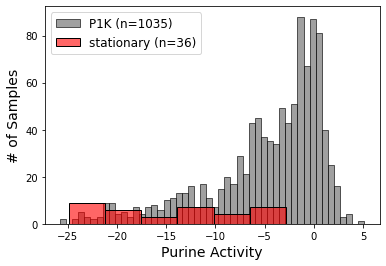

In [67]:
im_of_interest = 'Purine'
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(p1k.A.loc[im_of_interest], ax=ax, bins=50, label=f'P1K (n={p1k.A.shape[1]})', color='gray')
sns.histplot(inferred_A.loc[im_of_interest], ax=ax, bins=6, label=f'{PROJECT_NAME} (n={inferred_A.shape[1]})', color='red', alpha=0.6)
ax.legend(fontsize=12)
ax.set_xlabel(f'{im_of_interest} Activity', fontsize=14)
a = ax.set_ylabel('# of Samples', fontsize=14)

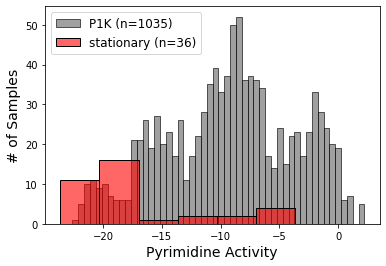

In [68]:
im_of_interest = 'Pyrimidine'
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(p1k.A.loc[im_of_interest], ax=ax, bins=50, label=f'P1K (n={p1k.A.shape[1]})', color='gray')
sns.histplot(inferred_A.loc[im_of_interest], ax=ax, bins=6, label=f'{PROJECT_NAME} (n={inferred_A.shape[1]})', color='red', alpha=0.6)
ax.legend(fontsize=12)
ax.set_xlabel(f'{im_of_interest} Activity', fontsize=14)
a = ax.set_ylabel('# of Samples', fontsize=14)

The activity phase plane below highlights the stronger correlation between purine and pyrimidine iModulon activities in the Stationary Phase study compared to the P1K Dataset.

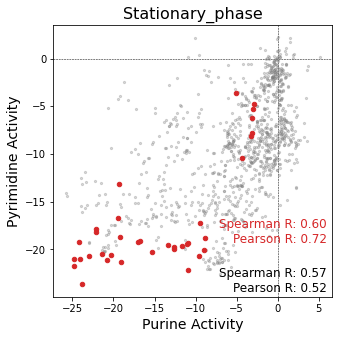

In [69]:
x_p1k_acts, y_p1k_acts = p1k.A.loc[X_IM], p1k.A.loc[Y_IM]

conds = p1k.sample_table[p1k.sample_table['condition'].str.startswith('GlcM9')].index

_, ax = plt.subplots(figsize=(5, 5))
spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', 
        transform=ax.transAxes, ha='right', fontsize=12)

r, p = pearsonr(x_p1k_acts, y_p1k_acts)

ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
ax.scatter(x_p1k_acts, y_p1k_acts, c='tab:gray', s=5, alpha=0.3)

for cond, cond_df in project_metadata.groupby('condition'):
    ax.scatter(inferred_A[cond_df.index].loc[X_IM], inferred_A[cond_df.index].loc[Y_IM], s=20, c='tab:red')

x_proj_acts, y_proj_acts = inferred_A.loc[X_IM], inferred_A.loc[Y_IM]
proj_spearman_r, p = spearmanr(x_proj_acts, y_proj_acts)
proj_pearson_r, p = pearsonr(x_proj_acts, y_proj_acts)
ax.text(0.98, 0.2, f'Spearman R: {proj_spearman_r:.2f}\nPearson R: {proj_pearson_r:.2f}', 
        transform=ax.transAxes, ha='right', color='tab:red', fontsize=12)

ax.set_title('Stationary_phase', fontsize=16)
ax.set_xlabel(f'{X_IM} Activity', fontsize=14)
a = ax.set_ylabel(f'{Y_IM} Activity', fontsize=14)

We can view iModulon activity bar plots for this study, but the samples are not ordered by time point in these bar plots. As such, time course line plots would be more informative.

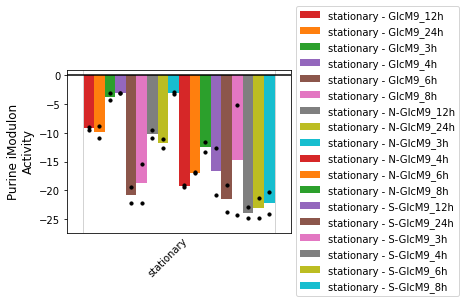

In [70]:
im_of_interest = 'Purine'
_, ax = plt.subplots(figsize=(4, 3))
plot_activities(p1k_plus_new_data, im_of_interest, ax=ax, projects=[PROJECT_NAME], highlight=PROJECT_NAME)
a = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

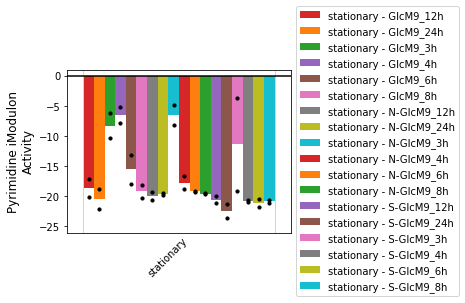

In [71]:
im_of_interest = 'Pyrimidine'
_, ax = plt.subplots(figsize=(4, 3))
plot_activities(p1k_plus_new_data, im_of_interest, ax=ax, projects=[PROJECT_NAME], highlight=PROJECT_NAME)
a = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [72]:
#p1k_plus_new_data.sample_table[p1k_plus_new_data.sample_table['project'] == 'stationary']

We will plot purine and pyrimidine iModulon activity as a function of time for each nutrient depletion condition. Cells grew exponentially for the first 6 hours of the study. After 8 hours, measurements indicated that the cells had entered the stationary phase. These growth patterns are reflected in the activity time course plots.

In [73]:
def stationary_im_activity(im):
    c_acts, n_acts, s_acts = list(), list(), list()
    chosen_im_acts = inferred_A.loc[im]
    for cond_str, cond_df in project_metadata.groupby('condition'): 
        im_acts = chosen_im_acts.loc[cond_df.index]
        nutrient_cond = cond_str.split('_')[0]
        if nutrient_cond == "GlcM9":
            c_acts.append(im_acts.mean())
        elif nutrient_cond == "N-GlcM9":
            n_acts.append(im_acts.mean())
        else:
            s_acts.append(im_acts.mean())
    return c_acts, n_acts, s_acts

In [74]:
# times = [3, 4, 6, 8, 12, 24]
# purine_c_acts, purine_n_acts, purine_s_acts = stationary_im_activity('Purine')
# pyrimidine_c_acts, pyrimidine_n_acts, pyrimidine_s_acts = stationary_im_activity('Pyrimidine')
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# ax1.plot(times, purine_c_acts, color='black', marker=".", label='Purine iM Activity')
# ax1.plot(times, pyrimidine_c_acts, color='dimgray', marker=".", label='Pyrimidine iM Activity')
# ax2.plot(times, purine_n_acts, color='blue', marker=".", label='Purine iM Activity')
# ax2.plot(times, pyrimidine_n_acts, color='royalblue', marker=".", label='Pyrimidine iM Activity')
# ax3.plot(times, purine_s_acts, color='darkred', marker=".", label='Purine iM Activity')
# ax3.plot(times, pyrimidine_s_acts, color='red', marker=".", label='Pyrimidine iM Activity')

# ax1.set_title('Carbon Depletion', fontsize=16)
# ax2.set_title('Nitrogen Depletion', fontsize=16)
# ax3.set_title('Sulfur Depletion', fontsize=16)
# for ax in (ax1, ax2, ax3):
#     ax.set_xlabel('Time (hours)', fontsize=16)
#     ax.set_ylabel('iModulon Activity', fontsize=16)
#     ax.tick_params(axis='both', labelsize=12)
#     ax.legend(fontsize=14)
#     y = ax.set_ylim(-25, 0)

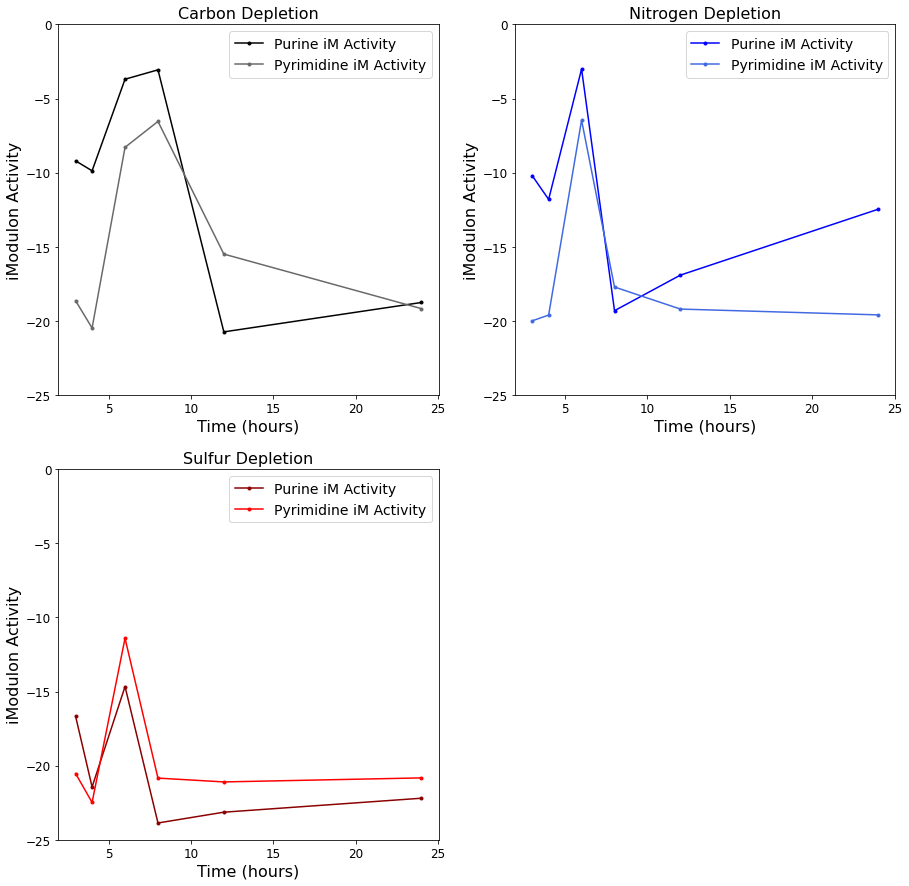

In [75]:
times = [3, 4, 6, 8, 12, 24]
purine_c_acts, purine_n_acts, purine_s_acts = stationary_im_activity('Purine')
pyrimidine_c_acts, pyrimidine_n_acts, pyrimidine_s_acts = stationary_im_activity('Pyrimidine')

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0,0].plot(times, purine_c_acts, color='black', marker=".", label='Purine iM Activity')
axs[0,0].plot(times, pyrimidine_c_acts, color='dimgray', marker=".", label='Pyrimidine iM Activity')
axs[0,1].plot(times, purine_n_acts, color='blue', marker=".", label='Purine iM Activity')
axs[0,1].plot(times, pyrimidine_n_acts, color='royalblue', marker=".", label='Pyrimidine iM Activity')
axs[1,0].plot(times, purine_s_acts, color='darkred', marker=".", label='Purine iM Activity')
axs[1,0].plot(times, pyrimidine_s_acts, color='red', marker=".", label='Pyrimidine iM Activity')

axs[0,0].set_title('Carbon Depletion', fontsize=16)
axs[0,1].set_title('Nitrogen Depletion', fontsize=16)
axs[1,0].set_title('Sulfur Depletion', fontsize=16)
axs[1,1].axis('off')
for ax in axs.flat[:-1]:
    ax.set_xlabel('Time (hours)', fontsize=16)
    ax.set_ylabel('iModulon Activity', fontsize=16)
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    y = ax.set_ylim(-25, 0)

In each time course plot, iModulon activities increase during the exponential growth phase, followed by a sharp decrease that marks the transition to the stationary phase. However, after this decrease, purine iModulon activity starts to increase again in the carbon and nitrogen depletion conditions. The same pattern is not observed in the pyrimidine iModulon. This opens up a new avenue for exploration: what causes the “recovery” of purine iModulon activity in the stationary phase?

To answer this question, we will first examine the regulators of each iModulon. The purine iModulon is regulated by PurR and ppGpp. PurR is encoded by the purR gene, and ppGpp metabolism is governed by the gene products of relA and spoT. The pyrimidine iModulon is regulated by PurR and UTP. UTP biosynthesis is regulated by the genes pyrH, adk, and ndk. If expression of these genes follows the same pattern as iModulon activity, this could imply that the regulators play a direct role. The figure below shows, for the carbon- and nitrogen-limiting conditions, the purine iModulon activity time course plot next to the gene expression time course plots for the purR gene and ppGpp-related genes.

In [76]:
def stationary_gene_expr(gene):
    c_expr, n_expr, s_expr = list(), list(), list()
    chosen_gene_expr = p1k_plus_new_data.X.loc[gene]
    for cond_str, cond_df in project_metadata.groupby('condition'): 
        gene_expr = chosen_gene_expr.loc[cond_df.index]
        nutrient_cond = cond_str.split('_')[0]
        if nutrient_cond == "GlcM9":
            c_expr.append(gene_expr.mean())
        elif nutrient_cond == "N-GlcM9":
            n_expr.append(gene_expr.mean())
        else:
            s_expr.append(gene_expr.mean())
    return c_expr, n_expr, s_expr

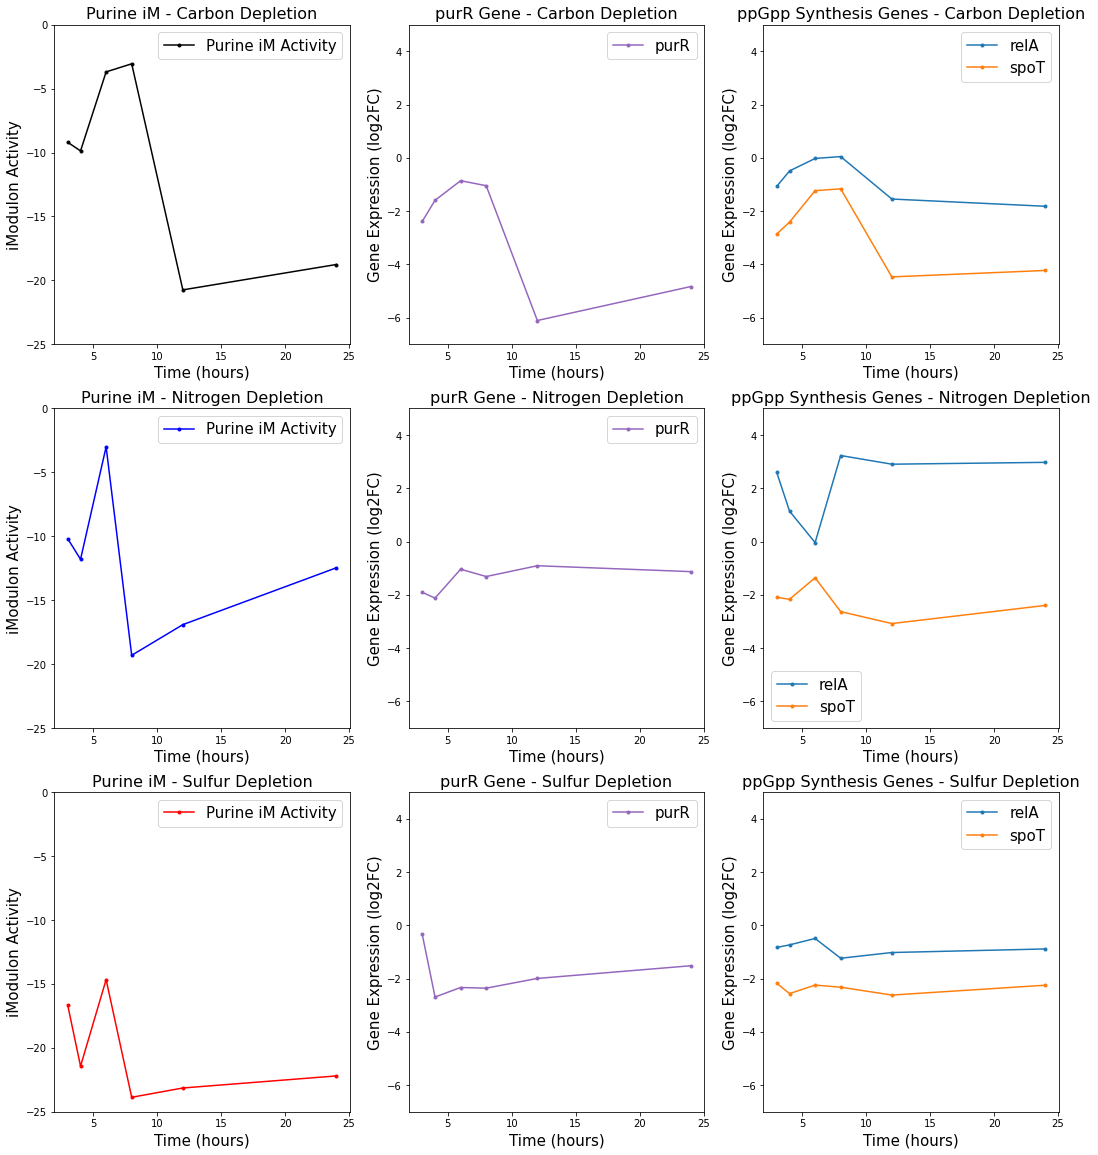

In [77]:
# Purine iM, regulator purR, genes involved in synthesis of regulator ppGpp
times = [3, 4, 6, 8, 12, 24]
purine_c_acts, purine_n_acts, purine_s_acts = stationary_im_activity('Purine')
purr_c_expr, purr_n_expr, purr_s_expr = stationary_gene_expr('b1658')
rela_c_expr, rela_n_expr, rela_s_expr = stationary_gene_expr('b2784')
spot_c_expr, spot_n_expr, spot_s_expr = stationary_gene_expr('b3650')

fig, axs = plt.subplots(3, 3, figsize=(18, 20))
titlesize = 16
size = 15
axs[0,0].plot(times, purine_c_acts, color='black', marker=".", label='Purine iM Activity')
axs[1,0].plot(times, purine_n_acts, color='blue', marker=".", label='Purine iM Activity')
axs[2,0].plot(times, purine_s_acts, color='red', marker=".", label='Purine iM Activity')

axs[0,0].set_title('Purine iM - Carbon Depletion', fontsize=titlesize)
axs[1,0].set_title('Purine iM - Nitrogen Depletion', fontsize=titlesize)
axs[2,0].set_title('Purine iM - Sulfur Depletion', fontsize=titlesize)
for i in range(3):
    axs[i,0].set_xlabel('Time (hours)', fontsize=size)
    axs[i,0].set_ylabel('iModulon Activity', fontsize=size)
    axs[i,0].legend(fontsize=size)
    y = axs[i,0].set_ylim(-25, 0)

axs[0,1].plot(times, purr_c_expr, color='tab:purple', marker=".", label='purR')
axs[1,1].plot(times, purr_n_expr, color='tab:purple', marker=".", label='purR')
axs[2,1].plot(times, purr_s_expr, color='tab:purple', marker=".", label='purR')
axs[0,1].set_title('purR Gene - Carbon Depletion', fontsize=titlesize)
axs[1,1].set_title('purR Gene - Nitrogen Depletion', fontsize=titlesize)
axs[2,1].set_title('purR Gene - Sulfur Depletion', fontsize=titlesize)

axs[0,2].plot(times, rela_c_expr, marker=".", label='relA')
axs[1,2].plot(times, rela_n_expr, marker=".", label='relA')
axs[2,2].plot(times, rela_s_expr, marker=".", label='relA')
axs[0,2].plot(times, spot_c_expr, marker=".", label='spoT')
axs[1,2].plot(times, spot_n_expr, marker=".", label='spoT')
axs[2,2].plot(times, spot_s_expr, marker=".", label='spoT')
axs[0,2].set_title('ppGpp Synthesis Genes - Carbon Depletion', fontsize=titlesize)
axs[1,2].set_title('ppGpp Synthesis Genes - Nitrogen Depletion', fontsize=titlesize)
axs[2,2].set_title('ppGpp Synthesis Genes - Sulfur Depletion', fontsize=titlesize)

for i in range(3):
    for j in range(1,3):
        axs[i,j].set_xlabel('Time (hours)', fontsize=size)
        axs[i,j].set_ylabel('Gene Expression (log2FC)', fontsize=size)
        axs[i,j].legend(loc='best', fontsize=size)
        ax.tick_params(axis='both', labelsize=12)
        axs[i,j].set_ylim(-7, 5)

In the figure above, purR expression in the carbon-limiting condition does show an increase similar to that of purine iModulon activity; however, since the same increase in purR expression does not occur in the nitrogen-limiting condition, it is unlikely that PurR regulation is the culprit for “recovery” of purine iModulon activity. As for the genes that regulate ppGpp metabolism, their expression stays relatively constant after the point of “recovery” (12 hours for carbon starvation, 8 hours for nitrogen starvation), implying that ppGpp is also not involved. 

Next, we examine the time course plots for pyrimidine iModulon activity, purR gene expression, and UTP-related gene expression.

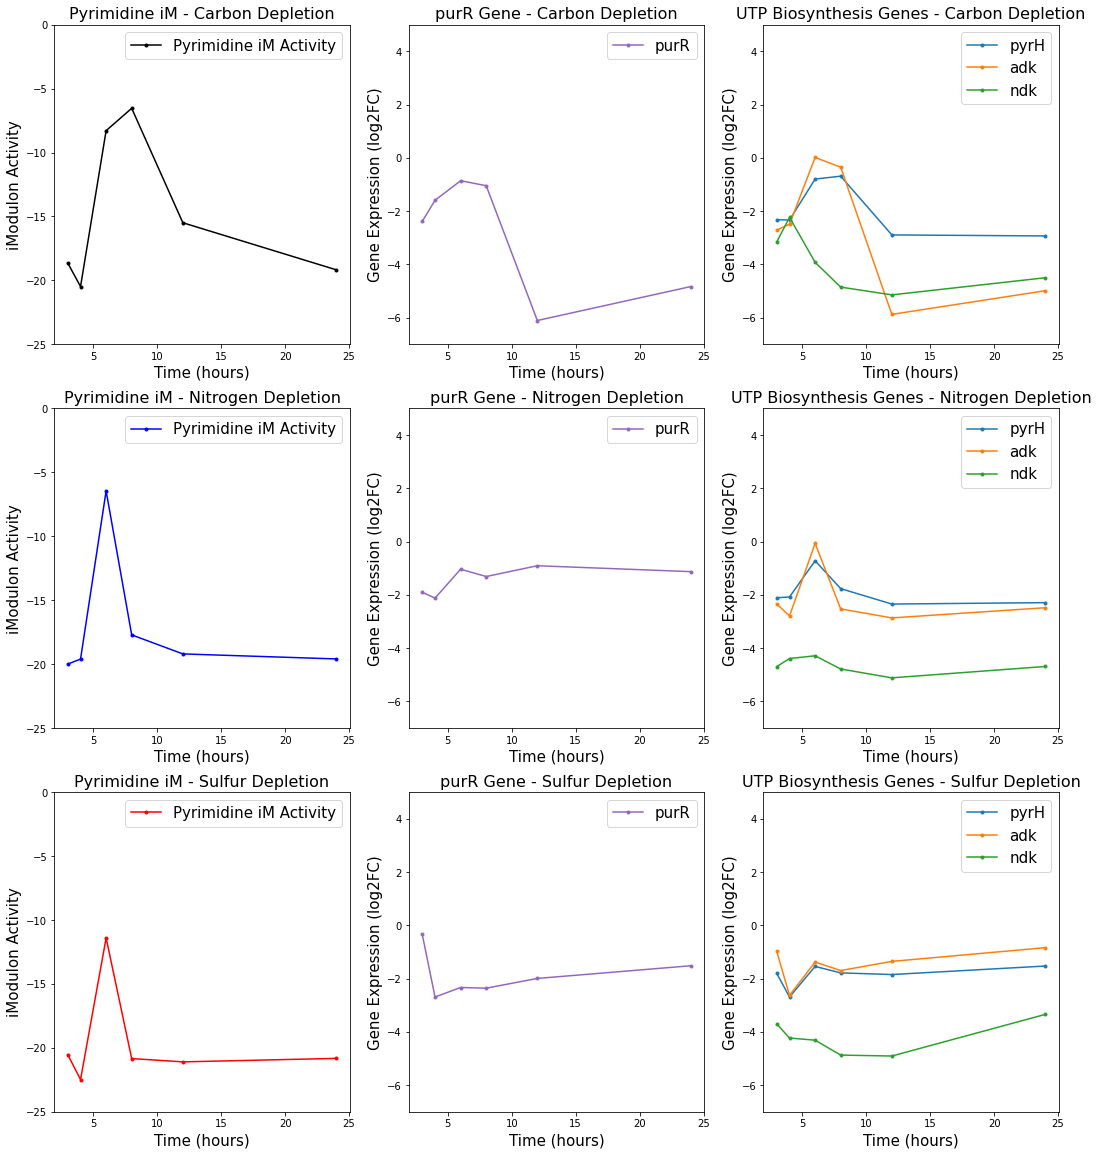

In [78]:
# Pyrimidine iM, regulator purR, genes involved in synthesis of regulator UTP
times = [3, 4, 6, 8, 12, 24]
pyrimidine_c_acts, pyrimidine_n_acts, pyrimidine_s_acts = stationary_im_activity('Pyrimidine')
purr_c_expr, purr_n_expr, purr_s_expr = stationary_gene_expr('b1658')
pyrh_c_expr, pyrh_n_expr, pyrh_s_expr = stationary_gene_expr('b0171')
adk_c_expr, adk_n_expr, adk_s_expr = stationary_gene_expr('b0474')
ndk_c_expr, ndk_n_expr, ndk_s_expr = stationary_gene_expr('b2518')

titlesize = 16
size = 15
fig, axs = plt.subplots(3, 3, figsize=(18, 20))
axs[0,0].plot(times, pyrimidine_c_acts, color='black', marker=".", label='Pyrimidine iM Activity')
axs[1,0].plot(times, pyrimidine_n_acts, color='blue', marker=".", label='Pyrimidine iM Activity')
axs[2,0].plot(times, pyrimidine_s_acts, color='red', marker=".", label='Pyrimidine iM Activity')

axs[0,0].set_title('Pyrimidine iM - Carbon Depletion', fontsize=titlesize)
axs[1,0].set_title('Pyrimidine iM - Nitrogen Depletion', fontsize=titlesize)
axs[2,0].set_title('Pyrimidine iM - Sulfur Depletion', fontsize=titlesize)
for i in range(3):
    axs[i,0].set_xlabel('Time (hours)', fontsize=size)
    axs[i,0].set_ylabel('iModulon Activity', fontsize=size)
    axs[i,0].legend(fontsize=size)
    ax.tick_params(axis='both', labelsize=13)
    y = axs[i,0].set_ylim(-25, 0)

axs[0,1].plot(times, purr_c_expr, color='tab:purple', marker=".", label='purR')
axs[1,1].plot(times, purr_n_expr, color='tab:purple', marker=".", label='purR')
axs[2,1].plot(times, purr_s_expr, color='tab:purple', marker=".", label='purR')
axs[0,1].set_title('purR Gene - Carbon Depletion', fontsize=titlesize)
axs[1,1].set_title('purR Gene - Nitrogen Depletion', fontsize=titlesize)
axs[2,1].set_title('purR Gene - Sulfur Depletion', fontsize=titlesize)

axs[0,2].plot(times, pyrh_c_expr, marker=".", label='pyrH')
axs[1,2].plot(times, pyrh_n_expr, marker=".", label='pyrH')
axs[2,2].plot(times, pyrh_s_expr, marker=".", label='pyrH')
axs[0,2].plot(times, adk_c_expr, marker=".", label='adk')
axs[1,2].plot(times, adk_n_expr, marker=".", label='adk')
axs[2,2].plot(times, adk_s_expr, marker=".", label='adk')
axs[0,2].plot(times, ndk_c_expr, marker=".", label='ndk')
axs[1,2].plot(times, ndk_n_expr, marker=".", label='ndk')
axs[2,2].plot(times, ndk_s_expr, marker=".", label='ndk')
axs[0,2].set_title('UTP Biosynthesis Genes - Carbon Depletion', fontsize=titlesize)
axs[1,2].set_title('UTP Biosynthesis Genes - Nitrogen Depletion', fontsize=titlesize)
axs[2,2].set_title('UTP Biosynthesis Genes - Sulfur Depletion', fontsize=titlesize)

for i in range(3):
    for j in range(1,3):
        axs[i,j].set_xlabel('Time (hours)', fontsize=size)
        axs[i,j].set_ylabel('Gene Expression (log2FC)', fontsize=size)
        axs[i,j].legend(loc='best', fontsize=size)
        ax.tick_params(axis='both', labelsize=13)
        axs[i,j].set_ylim(-7, 5)

In the figure above, there are cases where gene expression increases slightly while pyrimidine iModulon activity decreases or stays constant. All in all, these findings show that focusing only on the expression of genes related to iModulon regulators is not sufficient to explain patterns in iModulon activity.

To explore further, we will plot expression of genes belonging to each iModulon, as these gene expression patterns will likely reflect and explain overall iModulon activity. Here, we divide the genes by membership in biosynthesis pathways versus salvage pathways and explore which group of genes follows the “recovery” pattern more strongly. Below, we examine the time course plot for purine iModulon activity next to the time course plots for expression of purine biosynthesis and salvage genes.

In [79]:
def gene_name_to_b(gene):
    gene_table = p1k_plus_new_data.gene_table
    return gene_table[gene_table.gene_name == gene].index.astype(str)[0]

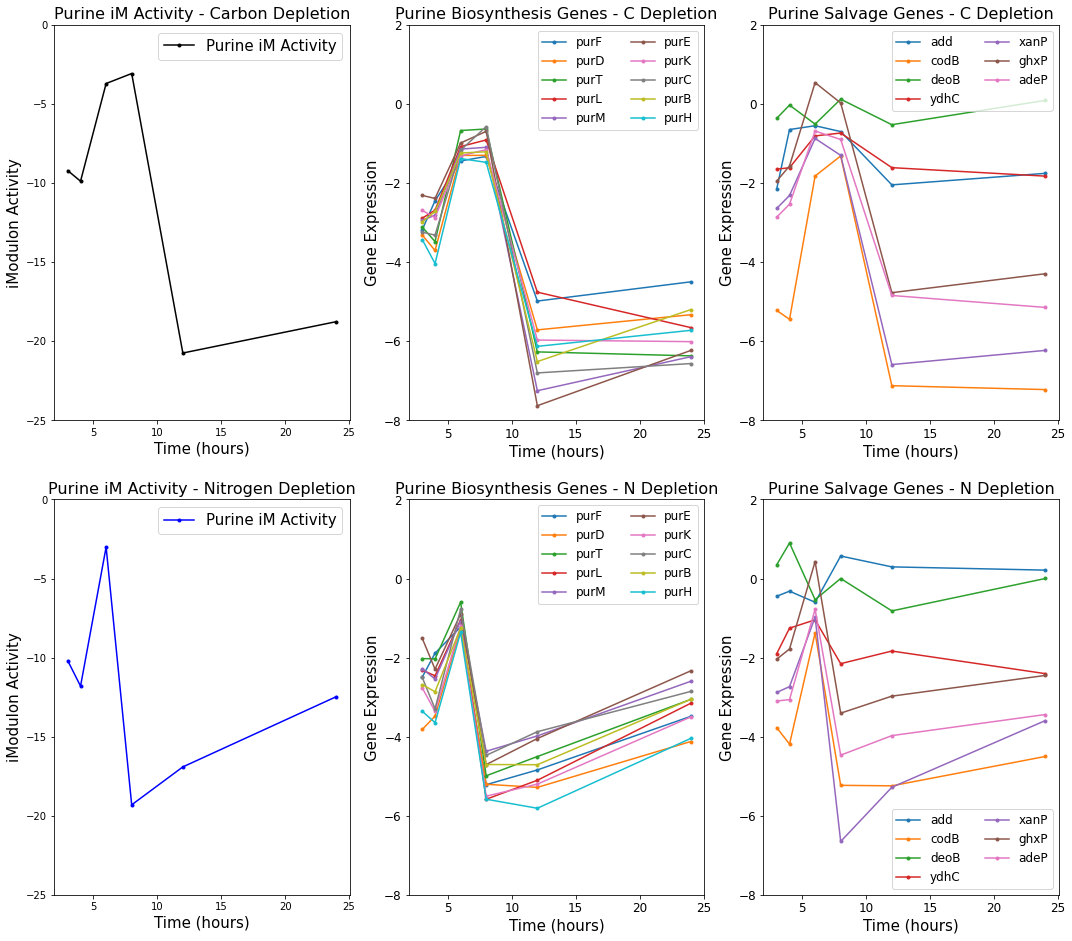

In [80]:
times = [3, 4, 6, 8, 12, 24]
purine_c_acts, purine_n_acts, purine_s_acts = stationary_im_activity('Purine')
fig, axs = plt.subplots(2, 3, figsize=(18, 16))
size=15
titlesize=16
axs[0,0].plot(times, purine_c_acts, color='black', marker=".", label='Purine iM Activity')
axs[1,0].plot(times, purine_n_acts, color='blue', marker=".", label='Purine iM Activity')
axs[0,0].set_title('Purine iM Activity - Carbon Depletion', fontsize=titlesize)
axs[1,0].set_title('Purine iM Activity - Nitrogen Depletion', fontsize=titlesize)

pur_biosynth_genes = ['purF', 'purD', 'purT', 'purL', 'purM', 'purE', 'purK', 'purC', 'purB', 'purH']
pur_salvage_genes = ['add', 'codB', 'deoB', 'ydhC', 'xanP', 'ghxP', 'adeP']
for gene in pur_biosynth_genes:
    c1, n1, s1 = stationary_gene_expr(gene_name_to_b(gene))
    axs[0,1].plot(times, c1, marker='.', label=f'{gene}')
    axs[1,1].plot(times, n1, marker='.', label=f'{gene}')
for gene in pur_salvage_genes:
    c2, n2, s2 = stationary_gene_expr(gene_name_to_b(gene))
    axs[0,2].plot(times, c2, marker='.', label=f'{gene}')
    axs[1,2].plot(times, n2, marker='.', label=f'{gene}')
axs[0,1].set_title('Purine Biosynthesis Genes - C Depletion', fontsize=titlesize)
axs[0,2].set_title('Purine Salvage Genes - C Depletion', fontsize=titlesize)
axs[1,1].set_title('Purine Biosynthesis Genes - N Depletion', fontsize=titlesize)
axs[1,2].set_title('Purine Salvage Genes - N Depletion', fontsize=titlesize)
    
for i in range(2):
    axs[i,0].set_xlabel('Time (hours)', fontsize=size)
    axs[i,0].set_ylabel('iModulon Activity', fontsize=size)
    axs[i,0].legend(fontsize=size)
    
    y = axs[i,0].set_ylim(-25, 0)
    for j in range(1, 3):
        axs[i,j].set_xlabel('Time (hours)', fontsize=size)
        axs[i,j].set_ylabel('Gene Expression', fontsize=size)
        axs[i,j].legend(ncol=2, fontsize=12)
        axs[i,j].tick_params(axis='both', labelsize=12)
        axs[i,j].set_ylim(-8, 2)

In the figure above, for both nutrient-limiting conditions, the same upward trend for purine iModulon activity is seen in the expression of purine biosynthesis genes, but not in salvage genes. Thus, the purine biosynthesis pathway is implicated in purine iModulon “recovery” during the stationary phase. This finding is consistent with the gene weight plot from the P-MG1655 dataset, since most of the highest-weighted purine iModulon genes were purine biosynthesis genes. 

Next, we examine the same plots for the pyrimidine iModulon.

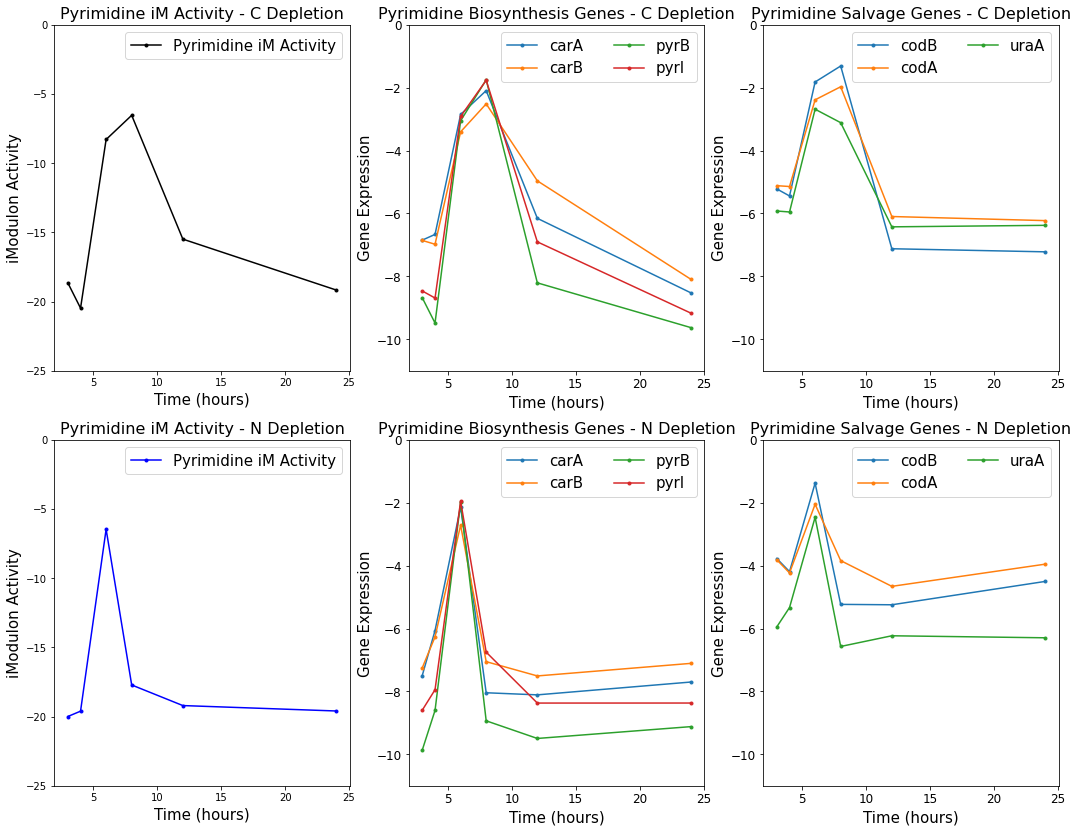

In [81]:
times = [3, 4, 6, 8, 12, 24]
pyr_c_acts, pyr_n_acts, pyr_s_acts = stationary_im_activity('Pyrimidine')
fig, axs = plt.subplots(2, 3, figsize=(18, 14))
axs[0,0].plot(times, pyr_c_acts, color='black', marker=".", label='Pyrimidine iM Activity')
axs[1,0].plot(times, pyr_n_acts, color='blue', marker=".", label='Pyrimidine iM Activity')
axs[0,0].set_title('Pyrimidine iM Activity - C Depletion', fontsize=titlesize)
axs[1,0].set_title('Pyrimidine iM Activity - N Depletion', fontsize=titlesize)

pyr_biosynth_genes = ['carA', 'carB', 'pyrB', 'pyrI']
pyr_salvage_genes = ['codB', 'codA', 'uraA']
for gene in pyr_biosynth_genes:
    c1, n1, s1 = stationary_gene_expr(gene_name_to_b(gene))
    axs[0,1].plot(times, c1, marker='.', label=f'{gene}')
    axs[1,1].plot(times, n1, marker='.', label=f'{gene}')
for gene in pyr_salvage_genes:
    c2, n2, s2 = stationary_gene_expr(gene_name_to_b(gene))
    axs[0,2].plot(times, c2, marker='.', label=f'{gene}')
    axs[1,2].plot(times, n2, marker='.', label=f'{gene}')
axs[0,1].set_title('Pyrimidine Biosynthesis Genes - C Depletion', fontsize=titlesize)
axs[0,2].set_title('Pyrimidine Salvage Genes - C Depletion', fontsize=titlesize)
axs[1,1].set_title('Pyrimidine Biosynthesis Genes - N Depletion', fontsize=titlesize)
axs[1,2].set_title('Pyrimidine Salvage Genes - N Depletion', fontsize=titlesize)
    
for i in range(2):
    axs[i,0].set_xlabel('Time (hours)', fontsize=size)
    axs[i,0].set_ylabel('iModulon Activity', fontsize=size)
    axs[i,0].legend(fontsize=size)
    y = axs[i,0].set_ylim(-25, 0)
    for j in range(1, 3):
        axs[i,j].set_xlabel('Time (hours)', fontsize=size)
        axs[i,j].set_ylabel('Gene Expression', fontsize=size)
        axs[i,j].legend(ncol=2, fontsize=size)
        axs[i,j].tick_params(axis='both', labelsize=12)
        axs[i,j].set_ylim(-11, 0)

The figure above shows that in the carbon depletion condition, pyrimidine biosynthesis gene expression follows the same trend as pyrimidine iModulon activity, but pyrimidine salvage gene expression differs. This indicates that pyrimidine iModulon activity is more strongly connected to expression of genes in the pyrimidine biosynthetic pathway. This finding is consistent with the gene weight plot from the P-MG1655 dataset, since pyrB and pyrI were the genes with highest weight, followed by carA and carB.

In this exploration of purine and pyrimidine iModulon behavior in the stationary phase, we found that purine iModulon activity “recovers” during the stationary phase in carbon and nitrogen depletion conditions. This behavior is linked to expression of purine biosynthesis genes. On the other hand, while pyrimidine iModulon activity in the stationary phase is linked to the expression of pyrimidine biosynthesis genes, pyrimidine iModulon activity does not increase in the stationary phase. Potential explanations for this difference in activity include differential availability of purine vs. pyrimidine precursors under different nutrient depletion conditions, or greater demand for purines under stress or starvation conditions. Further investigation is required to identify the underlying cause. All in all, iModulon analysis is a powerful tool to gain functional and mechanistic understandings of biological phenomena.

### Unused figures and code

In [82]:
# def stationary_plot_expressions(gene_list, title=None, font_size=12, ymin=None, ymax=None):
#     times = [3, 4, 6, 8, 12, 24]
#     fig, axs = plt.subplots(2, 2, figsize=(16, 12))
#     for gene in gene_list:
#         c, n, s = stationary_gene_expr(gene_name_to_b(gene))
#         axs[0,0].plot(times, c, marker='.', label=f'{gene}')
#         axs[0,1].plot(times, n, marker='.', label=f'{gene}')
#         axs[1,0].plot(times, s, marker='.', label=f'{gene}')
#     for ax in axs.flat[:-1]:
#         ax.set_xlabel('Time (hours)', fontsize=font_size)
#         ax.set_ylabel('Gene Expression', fontsize=font_size)
#         ax.legend(ncol=2, fontsize=font_size)
#         if ymin is not None and ymax is not None:
#             ax.set_ylim(ymin, ymax)
#     axs[0,0].set_title('Carbon Depletion', fontsize=font_size+2)
#     axs[0,1].set_title('Nitrogen Depletion', fontsize=font_size+2)
#     axs[1,0].set_title('Sulfur Depletion', fontsize=font_size+2)
#     axs[1,1].axis('off')
#     if title is not None:
#         fig.suptitle(f'{title}', fontsize=font_size+8)
#     return fig, axs

# def stationary_compare_expr(im_name, gene_list1, gene_list2, title=None, font_size=12, ymin=None, ymax=None):
#     times = [3, 4, 6, 8, 12, 24]
#     fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#     size=12
#     for gene in gene_list1:
#         c, n, s = stationary_gene_expr(gene_name_to_b(gene))
#         axs[0,0].plot(times, c, marker='.', label=f'{gene}')
#         axs[1,0].plot(times, n, marker='.', label=f'{gene}')
#         #axs[2,0].plot(times, s, marker='.', label=f'{gene}')
#     for gene in gene_list2:
#         c, n, s = stationary_gene_expr(gene_name_to_b(gene))
#         axs[0,1].plot(times, c, marker='.', label=f'{gene}')
#         axs[1,1].plot(times, n, marker='.', label=f'{gene}')
#         #axs[2,1].plot(times, s, marker='.', label=f'{gene}')
#     for ax in axs.flat:
#         ax.set_xlabel('Time (hours)', fontsize=font_size)
#         ax.set_ylabel('Gene Expression', fontsize=font_size)
#         ax.legend(ncol=2, fontsize=font_size)
#         if ymin is not None and ymax is not None:
#             ax.set_ylim(ymin, ymax)
#     axs[0,0].set_title(f'{im_name} Biosynthesis Genes - Carbon Depletion', fontsize=font_size+2)
#     axs[0,1].set_title(f'{im_name} Salvage Genes - Carbon Depletion', fontsize=font_size+2)
#     axs[1,0].set_title(f'{im_name} Biosynthesis Genes - Nitrogen Depletion', fontsize=font_size+2)
#     axs[1,1].set_title(f'{im_name} Salvage Genes - Nitrogen Depletion', fontsize=font_size+2)
#     #axs[2,0].set_title(f'{im_name} Biosynthesis Genes - Sulfur Depletion', fontsize=font_size+2)
#     #axs[2,1].set_title(f'{im_name} Salvage Genes - Sulfur Depletion', fontsize=font_size+2)
#     if title is not None:
#         fig.suptitle(f'{title}', fontsize=font_size+8)
#     return fig, axs

In [83]:
# X_IM, Y_IM = 'Pyrimidine', 'Purine'

In [84]:
# A = p1k.A
# _, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
# ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

# x_p1k_acts, y_p1k_acts = A.loc[X_IM], A.loc[Y_IM]

# # we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
# ax.scatter(x_p1k_acts, y_p1k_acts, c='gray', s=5, alpha=0.3)

# # you may need to move this label depending on your specific phase plane
# spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
# pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
# ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', 
#         transform=ax.transAxes, ha='right', fontsize=12)

# ax.set_xlabel(f'{X_IM} Activity', fontsize=13)
# ax.set_ylabel(f'{Y_IM} Activity', fontsize=13)
# ax.set_title('P1K Dataset', fontsize=14)

# A = p1k_plus_new_data.A

# ax2.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
# ax2.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

# x_p1k_acts, y_p1k_acts = A.loc[X_IM], A.loc[Y_IM]

# for cond, cond_df in project_metadata.groupby('condition'):
#     ax2.scatter(inferred_A[cond_df.index].loc[X_IM], inferred_A[cond_df.index].loc[Y_IM], c='r', s=7)

# # we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
# ax2.scatter(x_p1k_acts, y_p1k_acts, c='tab:blue', s=5, alpha=0.3)

# # you may need to move this label depending on your specific phase plane
# spearman_r2, p2 = spearmanr(x_p1k_acts, y_p1k_acts)
# pearson_r2, p2 = pearsonr(x_p1k_acts, y_p1k_acts)
# ax2.text(2.21, 0.02, f'Spearman R: {spearman_r2:.2f}\nPearson R: {pearson_r2:.2f}', 
#          transform=ax.transAxes, ha='right', fontsize=12)

# ax2.set_xlabel(f'{X_IM} Activity', fontsize=13)
# ax2.set_ylabel(f'{Y_IM} Activity', fontsize=13)
# ax2.set_title('P1K Dataset + Stationary Phase Paper', size=14)
# plt.tight_layout()

In [85]:
# x_p1k_acts, y_p1k_acts = p1k.A.loc[X_IM], p1k.A.loc[Y_IM]

# conds = p1k.sample_table[p1k.sample_table['condition'].str.startswith('GlcM9')].index

# _, ax = plt.subplots(figsize=(6, 4))

# r, p = pearsonr(x_p1k_acts, y_p1k_acts)
# ax.plot(np.unique(x_p1k_acts), np.poly1d(np.polyfit(x_p1k_acts, y_p1k_acts, 1))(np.unique(x_p1k_acts)),
#         linestyle='--', color='gray', label=f'P1K:\nPearson R: {r:.2f}\nP={p:.2E}', linewidth=1)

# ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
# ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
# ax.scatter(x_p1k_acts, y_p1k_acts, c='lightgray', s=5)

# for cond, cond_df in project_metadata.groupby('condition'):
#     ax.scatter(inferred_A[cond_df.index].loc[X_IM], inferred_A[cond_df.index].loc[Y_IM], s=20)

# x_inferred_acts, y_inferred_acts = inferred_A.loc[X_IM], inferred_A.loc[Y_IM]

# r, p = pearsonr(x_inferred_acts, y_inferred_acts)
# ax.plot(np.unique(x_inferred_acts), np.poly1d(np.polyfit(x_inferred_acts, y_inferred_acts, 1))(np.unique(x_inferred_acts)), 
#         linestyle='--', color='black', label=f'\nProject:\nPearson R: {r:.2f}\nP={p:.2E}', linewidth=1)
    
# ax.set_xlabel(f'{X_IM} Activity', fontsize=14)
# ax.set_ylabel(f'{Y_IM} Activity', fontsize=14)

# a = ax.legend()

Project phase plane

In [86]:
# A = p1k_plus_new_data.A
# for project, proj_md_df in p1k_plus_new_data.sample_table[p1k_plus_new_data.sample_table['Strain'] == 'MG1655'].groupby('project'):
#     if project == 'stationary':

#         _, ax = plt.subplots(figsize=(4, 4))

#         ax.axvline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)
#         ax.axhline(0, linestyle='--', color='black', zorder=-1, linewidth=0.5)

#         x_p1k_acts, y_p1k_acts = A.loc[X_IM], A.loc[Y_IM]

#         # we set the alpha to a lower value because it enhances our ability to tell where the points are more dense
#         ax.scatter(x_p1k_acts, y_p1k_acts, c='tab:gray', s=5, alpha=0.3)

#         # you may need to move this label depending on your specific phase plane
#         spearman_r, p = spearmanr(x_p1k_acts, y_p1k_acts)
#         pearson_r, p = pearsonr(x_p1k_acts, y_p1k_acts)
#         ax.text(0.98, 0.02, f'Spearman R: {spearman_r:.2f}\nPearson R: {pearson_r:.2f}', transform=ax.transAxes, ha='right')

#         # now overlay the project-specific data
#         proj_A = A[proj_md_df.index]
#         labels = proj_md_df['condition']
#         x_proj_acts, y_proj_acts = proj_A.loc[X_IM], proj_A.loc[Y_IM]
#         ax.scatter(x_proj_acts, y_proj_acts, c='tab:red', s=7)

#         # add in a project-specific set of correlations
#         proj_spearman_r, p = spearmanr(x_proj_acts, y_proj_acts)
#         proj_pearson_r, p = pearsonr(x_proj_acts, y_proj_acts)
#         ax.text(0.98, 0.2, f'Spearman R: {proj_spearman_r:.2f}\nPearson R: {proj_pearson_r:.2f}', transform=ax.transAxes, ha='right', color='tab:red')

#         ax.set_xlabel(f'{X_IM} Activity', fontsize=10)
#         ax.set_ylabel(f'{Y_IM} Activity', fontsize=10)
#         ax.set_title(proj_md_df['study'].iloc[0])

In [87]:
# compare_activities(p1k_plus_new_data, X_IM, Y_IM)
# a = ax.set_title('P1K Dataset + Stationary Phase Paper')

In [88]:
# # Purine iM activities in all projects
# plot_activities(p1k_proj2, 'Purine');

In [89]:
# # Activity spectra of projects where purine iM activity increased/decreased
# ax = plot_activities(p1k_proj2, 'Purine', projects=['SNPv1'])
# ax.get_legend().remove()

In [90]:
# ax = plot_activities(p1k_proj2, 'Purine', projects=['SNPv2'])
# ax.get_legend().remove()

In [99]:
# plot_activities(p1k_proj2, 'Purine', projects=['INDIMOD', 'TRN', 'abx_media', 'ica', 'electric_coli', 'tcs']);

In [100]:
# plot_activities(p1k_proj2, 'Purine', projects=['SNPv1', 'INDIMOD', 'TRN', 'abx_media', 'ica', 'electric_coli', 'tcs']);

In [101]:
# # Purine activity histogram
# _, ax = plt.subplots(figsize=(6, 4))
# sns.histplot(p1k_proj2.A.loc['Purine'], ax=ax, bins=50, 
#              label=f'P-MG1655 (n={p1k_proj2.A.shape[1]})', color='gray')
# ax.legend(fontsize=12)
# ax.set_xlabel(f'{X_IM} Activity', fontsize=14)
# a = ax.set_ylabel('# of Samples', fontsize=14)

In [102]:
# # Pyrimidine iM activities in all projects
# plot_activities(p1k_proj2, 'Pyrimidine');

In [103]:
# # Activity spectra of projects where pyrimidine iM activity increased/decreased
# ax = plot_activities(p1k_proj2, 'Pyrimidine', projects=['SNPv1'])
# ax.get_legend().remove()

In [104]:
# ax = plot_activities(p1k_proj2, 'Pyrimidine', projects=['SNPv2'])
# ax.get_legend().remove()

In [105]:
# plot_activities(p1k_proj2, 'Purine', projects=['SNPv1', 'INDIMOD', 'TRN', 'abx_media', 'ica', 'electric_coli', 'tcs']);

In [106]:
# # Pyrimidine activity histogram
# _, ax = plt.subplots(figsize=(6, 4))
# sns.histplot(p1k_proj2.A.loc[Y_IM], ax=ax, bins=50, 
#              label=f'P-MG1655 (n={p1k_proj2.A.shape[1]})', color='gray')
# ax.legend(fontsize=12)
# ax.set_xlabel(f'{Y_IM} Activity', fontsize=14)
# a = ax.set_ylabel('# of Samples', fontsize=14)